In [76]:
# libraries loaded in for functions

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)

## **DATA DESCRIPTION**
The dataset was collected by The Pacific Laboratory for Artificial Intelligence, which is a research group at UBC. PLAI set up a MineCraft server where they observed the players' gameplay, speech, and key presses.

The dataset consists of two files: players.csv and sessions.csv. 

### players.csv

- 196 rows
- 7 columns
- List that contains the information of all the players. 

Variables summary statistics: 

#### experience 
* Data type = factor
* Describes what skillset the player is classified: Amateur, Beginner, Regular, Pro, Veteran
* Class and mode = Character

#### subscribe:
* Data type = logical
* Describes whether the player is subscribed to the game-related newsletter
* 144 TRUE and 52 FALSE 

#### hashedEmail:
* Data type = character
* Email address of the player converted as a privacy-safe representation

#### played_hours:
* Data type = double
* Time (in hours) the player has spent playing the game
* Mean = 5.86
* Max. = 223.10

#### name:
* Data type = Character
* The name of the player

#### gender:
* Data type = factor
* Gender the player identifies as (Male, Female, Non-binary, Two-Spirited, Agender, prefers not to say, other)
* Class and mode = Character

#### Age:
* Date type = integer
* How old the player is in years
* Min = 9.00
* Median = 17
* Mean = 21.14
* Max = 58
* NA = 2


### sessions.csv
- 1535 rows
- 5 columns
- List of individual play sessions by each player

Variable summary statistics: 

#### hashedEmail:
* Data type = character
* Email address of the player converted as a privacy-safe representation

#### start_time:
* Data type = character
* Time the player began their play session (date and hour)

#### end_time:
* Data type = character
* The time the player stopped their play session (date and hour)
  
#### original_start_time 
* Data type = double
* Same as the start_time but recorded in UNIX time (milliseconds).
* Min = 1.71e+12
* Median = 1.72e+12
* Mean = 1.72e+12
* Max = 1.73e+12  
                    
#### original_end_time:
* Data type = double
* Same as the end_time but recorded in UNIX time (milliseconds)
* Min = 1.71e+12
* Median = 1.72e+12
* Mean = 1.72e+12
* Max = 1.73e+12
* NA = 2


### Potential Issues
**NAs (missing data)**

In players.csv:
- Age
- Subscribe

In sessions.csv 
- original_end_time

We would have to specify to R to ignore these NA values.

**Age is a dbl**
- Can switch to an int
- Age seen as whole number, not decimal

In [80]:
# Inputting the dataset into R

player_url <- "https://raw.githubusercontent.com/leahoh2006/dsci-100-project_template/refs/heads/main/data/players.csv"

player_data <- read_csv(player_url)

session_url <- "https://raw.githubusercontent.com/leahoh2006/dsci-100-project_template/refs/heads/main/data/sessions.csv"

session_data <- read_csv(session_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [65]:
#The summary statistics of players.csv

summary_player_data <- summary(player_data)
summary_player_data


# Finding the different groups of experience and gender (categorical variables)

player_data |>
distinct(experience, gender)


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience,gender
<chr>,<chr>
Pro,Male
Veteran,Male
Amateur,Female
⋮,⋮
Amateur,Non-binary
Regular,Two-Spirited
Pro,Other


In [46]:

#The summary statistic of sessions.csv
summary_session_data <- summary(session_data)
summary_session_data

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          


## **QUESTION TO BE EXPLORED**
- What characteristics and behaviours are the most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Can a player's age and total time played predict whether the player is subscribed to the game-related newsletter?**

#### Predictive Method
- K-nearest neighbour classification
Outcome variable: subscribed or not.
Predictors: age and played_hours.

These predictors will allow us to observe whether they have an impact if a player is subscribed to the game-related newsletter. 

#### Wrangling the Data
Use players.csv file for these variables:
* age
* played_hours
* subscribe

To wrangle the data:

* Select variables required (age, played_hours, subscribe)
* Filter out NAs in age
* Turn subscribe into a factor and replace names of factor values with other names



## **Exploratory Data Analysis**

The dataset (specifically players.csv) has been loaded into R already. We will now have to wrangle the data in order to turn it into a tidy format

In [66]:
# Turning the data tidy

player_data_wrangled <- player_data |>
    select(Age, played_hours, subscribe) |>
    na.omit(Age) |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "subscribed" = "TRUE", "not subscribed" = "FALSE"))

player_data_wrangled

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
9,30.3,subscribed
17,3.8,subscribed
17,0.0,not subscribed
⋮,⋮,⋮
22,0.3,not subscribed
57,0.0,not subscribed
17,2.3,not subscribed


In [67]:
# computing the mean for Age
age_mean <- player_data_wrangled |>
    summarize(age_mean = mean(Age))

age_mean

# computing the mean for played_hours
played_hours_mean <- player_data_wrangled |>
    summarize(played_hours_mean = mean(played_hours))
played_hours_mean

age_mean
<dbl>
21.13918


played_hours_mean
<dbl>
5.904639


#### Mean of Age and played_hours

| Age | played_hours |
| --- | --- |
| 21.14 | 5.90 |

### Visualizations


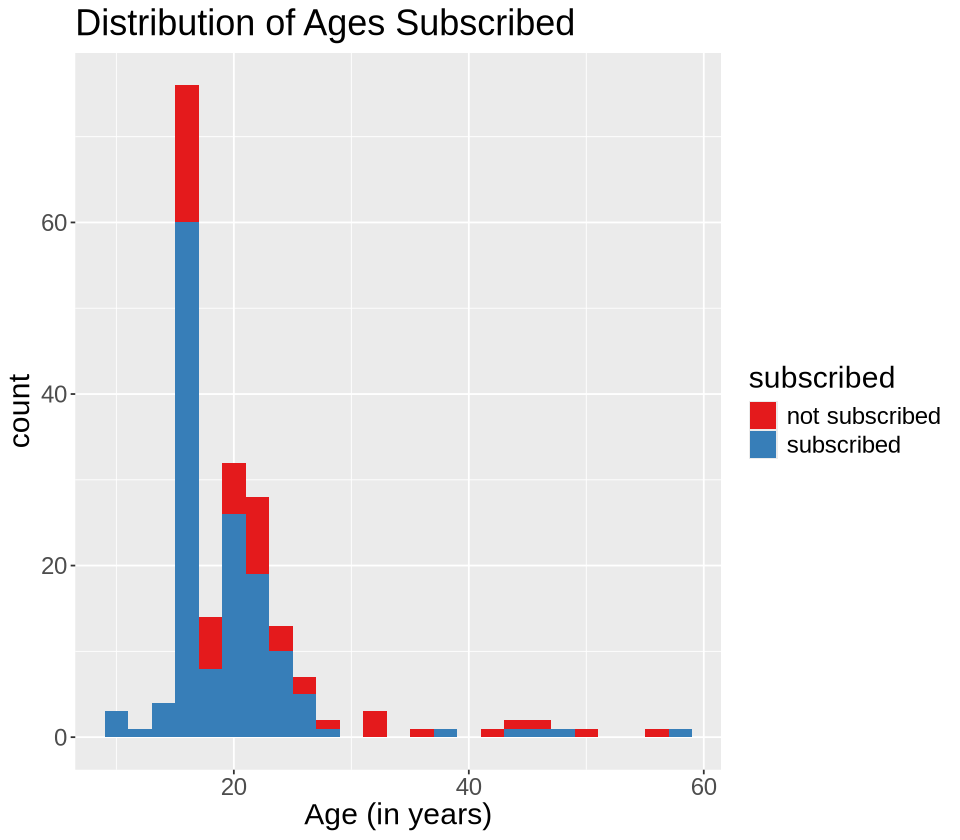

In [82]:
# Histogram
options(repr.plot.width = 8, repr.plot.height = 7)

age_and_played_hours_plot <- player_data_wrangled |>
    ggplot(aes(x = Age, fill = played_hours)) +
    geom_histogram(binwidth = 2) +
    labs(title = "Distribution of Ages Subscribed", x = "Age (in years)", fill = "subscribed") +
    theme(text = element_text(size = 18)) +
    scale_fill_brewer(palette = "Set1")

age_and_subscriptions_plot

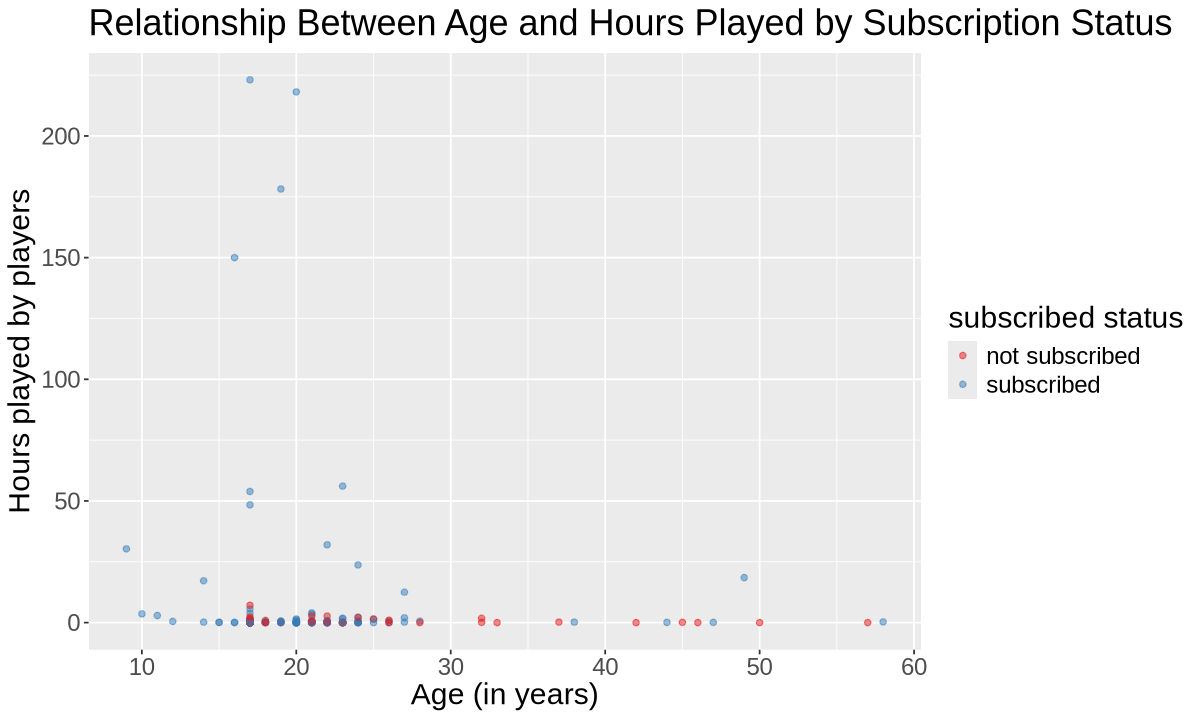

In [75]:
options(repr.plot.width = 10, repr.plot.height = 6)

# Scatterplot

player_data_scatter_plot <- player_data_wrangled |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point(alpha = 0.5) +
    labs(title = "Relationship Between Age and Hours Played by Subscription Status", x = "Age (in years)", y = "Hours played by players", colour = "subscribed status") +
    theme(text = element_text(size = 18)) +
    scale_color_brewer(palette = 'Set1')

player_data_scatter_plot

### Histogram
- Majority of ages between 10-30 years old
- Oldest age falls around the high 50s, while the youngest falls around age 10. 
- Majority of the players are subscribed
- Most ages have a bigger ratio of subscribed to not subscribed. 

This plot is relevant to my question as it shows that most ages have a higher subscribed ratio and that some ages are completely not subscribed.

### Scatterplot
- No apparent relationship between the age and played_hours; however, it's difficult to discern the points under the 25 hours for played_hours 
    - Due to four outliers above 150 hours
    - Causes the points on the bottom to be squished
- Generally, most ages play less than 25 hours, and the players with higher played hours are subscribed. 

### Potential Problems
- The four outliers in the scatterplot

KNN classification model is sensitive to outliers. Therefore, outliers can be filtered out to increase the accuracy of the model. 


## METHODS AND PLAN

#### Model
- K-nearest neighbour classification.
- Appropriate to predict a categorical label for an observation (whether the player is subscribed or not) based on two predictors (age and played hours)
- K-nearest neighbour regression and linear regression not suitable, as their response variables give quantitative values.    

#### Assumptions
- No assumptions are made about the data distribution.
- All the variables contribute equally to the distance calculation
- Works for binary and multi-class classification problems

#### Weaknesses
- Becomes slow as the training data gets larger.
- Doesn't perform well with a large number of predictors.
- Sensitive to noise and outliers. One point may influence the classification of the neighbours, depending on the number of K.

#### Processing the data
- Split the player.csv file into 60:40 a percent split: training and testing data.
- Find the value of K by splitting the training data into more training data and validation data sets. The workflow analysis from k = 2, 3, 4, 5, and 6.
- Use cross-validation (~5 folds) and plot the accuracy to choose the best K value.
- Pre-process training data (recipe, standardization)
- Create the knn model using the found K value
- Fit it into a workflow.
- Predict the labels in the testing data and then collect the metrics to see accuracy. 
